In [3]:
myvars = {}
with open("vvijayan-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()

In [4]:
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db= 'I501Sp22grp06_db')
cursor = conn.cursor()

In [5]:
cursor.execute('select * from Project_Data2');
rows = cursor.fetchall()

In [6]:
rows

((0,
  'gender',
  0,
  0,
  0,
  'ever_married',
  'work_type',
  'Residence_type',
  0.0,
  0.0,
  'smoking_status',
  0),
 (30669, 'Male', 3, 0, 0, 'No', 'children', 'Rural', 95.12, 18.0, '', 0),
 (30468,
  'Male',
  58,
  1,
  0,
  'Yes',
  'Private',
  'Urban',
  87.96,
  39.2,
  'never smoked',
  0),
 (16523, 'Female', 8, 0, 0, 'No', 'Private', 'Urban', 110.89, 17.6, '', 0),
 (56543,
  'Female',
  70,
  0,
  0,
  'Yes',
  'Private',
  'Rural',
  69.04,
  35.9,
  'formerly smoked',
  0),
 (46136, 'Male', 14, 0, 0, 'No', 'Never_worked', 'Rural', 161.28, 19.1, '', 0),
 (32257, 'Female', 47, 0, 0, 'Yes', 'Private', 'Urban', 210.95, 50.1, '', 0),
 (52800,
  'Female',
  52,
  0,
  0,
  'Yes',
  'Private',
  'Urban',
  77.59,
  17.7,
  'formerly smoked',
  0),
 (41413,
  'Female',
  75,
  0,
  1,
  'Yes',
  'Self-employed',
  'Rural',
  243.53,
  27.0,
  'never smoked',
  0),
 (15266,
  'Female',
  32,
  0,
  0,
  'Yes',
  'Private',
  'Rural',
  77.67,
  32.3,
  'smokes',
  0),
 (28674

In [7]:
import pandas as pd
group6_df = pd.read_csv('dataset-1.csv')
display(group6_df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [8]:
#checking for null values
group6_df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [28]:
df = group6_df.drop(['id'], axis = 1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,24,0,0,0,4,0,3984,74,0,0
1,1,79,1,0,1,2,1,3268,287,2,0
2,0,29,0,0,0,2,1,5544,70,0,0
3,0,91,0,0,1,2,0,1378,254,1,0
4,1,35,0,0,0,1,0,8677,85,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,31,0,0,0,4,1,354,98,2,0
43396,0,77,0,0,1,0,1,10967,449,1,0
43397,0,103,1,0,1,2,1,3666,184,1,0
43398,1,61,0,0,1,2,1,4388,227,2,0


In [10]:
#Replacing the null values
#performing Before fill
mean_value=group6_df['bmi'].mean()
group6_df['bmi'].fillna(value=mean_value, inplace=True)

#replaces null values with unknown for smoking_status
group6_df["smoking_status"].fillna("Unknown", inplace = True)
print(group6_df)

#checking for null values after replacement
group6_df.isnull().sum()


          id  gender   age  hypertension  heart_disease ever_married  \
0      30669    Male   3.0             0              0           No   
1      30468    Male  58.0             1              0          Yes   
2      16523  Female   8.0             0              0           No   
3      56543  Female  70.0             0              0          Yes   
4      46136    Male  14.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Yes   
43399  36271  Female  82.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          children          Rural              95.12  

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
# Checking for Duplicate Data
group6_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43395    False
43396    False
43397    False
43398    False
43399    False
Length: 43400, dtype: bool

In [12]:
#dropping the duplicate values
group6_df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


# Normality Test

In [25]:
# filter the variables to be used
from scipy.stats import normaltest

data_filtered = group6_df.filter(['gender ', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 
                           'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'])

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                43400 non-null  int8 
 1   hypertension       43400 non-null  int8 
 2   heart_disease      43400 non-null  int8 
 3   ever_married       43400 non-null  int8 
 4   work_type          43400 non-null  int8 
 5   Residence_type     43400 non-null  int8 
 6   avg_glucose_level  43400 non-null  int16
 7   bmi                43400 non-null  int16
 8   smoking_status     43400 non-null  int8 
 9   stroke             43400 non-null  int8 
dtypes: int16(2), int8(8)
memory usage: 508.7 KB


In [26]:
# convert to numerical
data_filtered = data_filtered.astype('category')
wd_column = data_filtered.select_dtypes(['category']).columns
data_filtered[wd_column] = data_filtered[wd_column].apply(lambda x: x.cat.codes)
print(data_filtered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                43400 non-null  int8 
 1   hypertension       43400 non-null  int8 
 2   heart_disease      43400 non-null  int8 
 3   ever_married       43400 non-null  int8 
 4   work_type          43400 non-null  int8 
 5   Residence_type     43400 non-null  int8 
 6   avg_glucose_level  43400 non-null  int16
 7   bmi                43400 non-null  int16
 8   smoking_status     43400 non-null  int8 
 9   stroke             43400 non-null  int8 
dtypes: int16(2), int8(8)
memory usage: 508.7 KB
None


In [27]:
# normality test
from scipy.stats import normaltest

stats, p = normaltest(data_filtered)
print('Statistics = %.3f, p = %.3f' % (stats.all(), p.all()))
# interpret results
alpha = 0.05
if p.all() > alpha:
    print('Cerebral Stroke data looks Gaussian (fail to reject H0)')
else:
    print('Cerebral Stroke data does not look Gaussian (reject H0)')

Statistics = 1.000, p = 0.000
Cerebral Stroke data does not look Gaussian (reject H0)


# DATA VISUALISATION

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

# Bar Chart

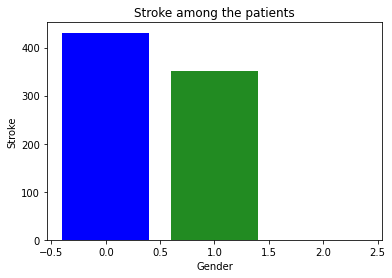

In [16]:
df_vis = group6_df.groupby('gender')['stroke'].sum().to_frame().reset_index()
#Creating the column plot 
plt.bar(df_vis['gender'],df_vis['stroke'],color = ['#0000FF','#228B22']) 
plt.title('Stroke among the patients')
plt.xlabel('Gender')
plt.ylabel('Stroke')
#Show the plot
plt.show()

# Scatter Plot

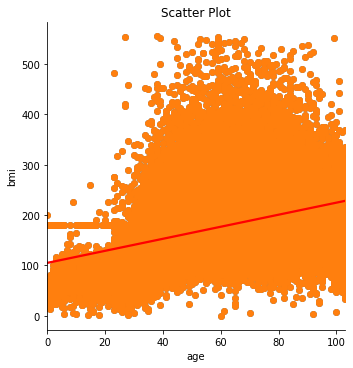

In [17]:
sns.lmplot(x = "age",
             y= "bmi",
             ci = None ,
             data =group6_df, line_kws={'color':'red'})
plt.scatter(group6_df['age'],group6_df['bmi'])
#adding title to the plot
plt.title("Scatter Plot")
#Setting the X and Y labels
#plt.xlabel('age')
#plt.ylabel('BMI')
#plt.show()
plt.show()

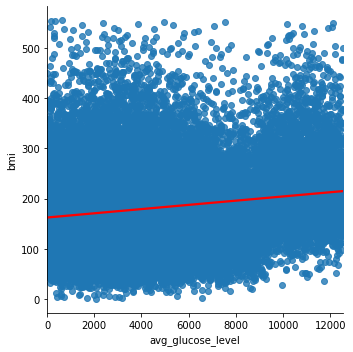

In [18]:
# import numpy as np
# plt.scatter(group6_df['avg_glucose_level'], df['bmi'])
## Adding Title to the plot
#plt.title("Scatter Plot")
#Setting the X and Y labels
# plt.xlabel('avg_glucose_level')
#plt.ylabel('bmi')
sns.lmplot(x = "avg_glucose_level",
           y= "bmi",
           ci = None,
           data = group6_df, line_kws={'color': 'red'})
plt.show()

# Box Plot

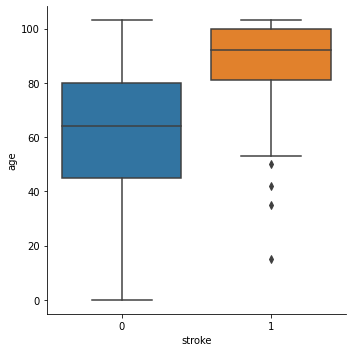

In [19]:
sns.catplot(x="stroke", y="age", kind="box", data=group6_df)

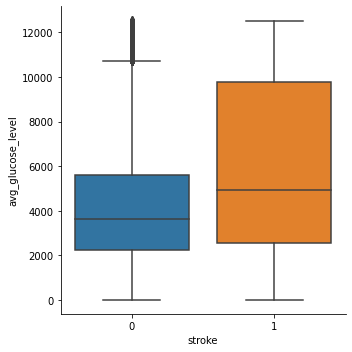

In [20]:
sns.catplot(x="stroke", y="avg_glucose_level", kind="box", data=group6_df)

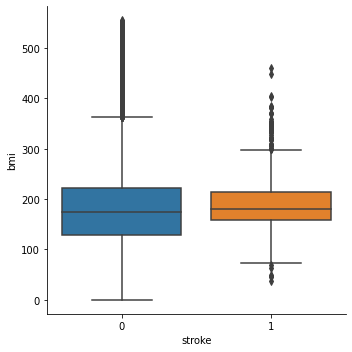

In [21]:
sns.catplot(x="stroke", y="bmi", kind="box", data=group6_df)

# Paired t-test

In [41]:
ttest_group6_df = group6_df.filter(['age', 'avg_glucose_level', 'stroke'])
ttest_group6_df.head()

,age,avg_glucose_level,stroke
0,24,3984,0
1,79,3268,0
2,29,5544,0
3,91,1378,0
4,35,8677,0


In [22]:
import numpy as np
import scipy
from scipy.stats import ttest_rel
from scipy import stats

In [23]:
# T-test for demographic factors against stroke
stats.ttest_rel(group6_df['age'], group6_df['stroke'])

Ttest_relResult(statistic=568.6828422830246, pvalue=0.0)

In [24]:
# T-test for average glucose value against stroke
stats.ttest_rel(group6_df['avg_glucose_level'], group6_df['stroke'])

Ttest_relResult(statistic=304.22938726057487, pvalue=0.0)

# Chi Square

In [45]:
#Chi square test for Smoking status and stroke
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
chisqt = pd.crosstab(group6_df.smoking_status, group6_df.stroke, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(95.68047028252671, 1.6720523293177542e-21, 2)


In [46]:
#Chi square test for Heart dieseas and stroke
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
chisqt = pd.crosstab(group6_df.heart_disease, group6_df.stroke, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(561.6830578575061, 1.0766478983274489e-122, 2)


# Point - Biserial Correlation

In [47]:
variable1 = group6_df['age']
variable2 = group6_df['stroke']
import scipy.stats as stats

#calculate point-biserial correlation
stats.pointbiserialr(variable1, variable2)

PointbiserialrResult(correlation=0.15378275672544459, pvalue=7.155304576042327e-228)

# MACHINE LEARNING

# Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler
Scaler= MinMaxScaler()
group6_df['age']=Scaler.fit_transform(group6_df['age'].values.reshape(-1, 1))
group6_df['avg_glucose_level']=Scaler.fit_transform(group6_df['avg_glucose_level'].values.reshape(-1, 1))
group6_df['bmi']=Scaler.fit_transform(group6_df['bmi'].values.reshape(-1, 1))
group6_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,18352,1,0.233010,0,0,0,4,0,0.317653,0.133333,0,0
1,18234,1,0.766990,1,0,1,2,1,0.260565,0.517117,2,0
2,9955,0,0.281553,0,0,0,2,1,0.442035,0.126126,0,0
3,33726,0,0.883495,0,0,1,2,0,0.109871,0.457658,1,0
4,27553,1,0.339806,0,0,0,1,0,0.691835,0.153153,0,0


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# print(scaler.fit(group6_df))
# print(scaler.mean_)
# print(scaler.transform(group6_df))
# print(scaler.transform([[2, 2]]))
group6_df['age']=Scaler.fit_transform(group6_df['age'].values.reshape(-1, 1))
group6_df['avg_glucose_level']=Scaler.fit_transform(group6_df['avg_glucose_level'].values.reshape(-1, 1))
group6_df['bmi']=Scaler.fit_transform(group6_df['bmi'].values.reshape(-1, 1))
group6_df.head()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,18352,1,0.233010,0,0,0,4,0,0.317653,0.133333,0,0
1,18234,1,0.766990,1,0,1,2,1,0.260565,0.517117,2,0
2,9955,0,0.281553,0,0,0,2,1,0.442035,0.126126,0,0
3,33726,0,0.883495,0,0,1,2,0,0.109871,0.457658,1,0
4,27553,1,0.339806,0,0,0,1,0,0.691835,0.153153,0,0


In [50]:
df = group6_df.drop(['id'], axis = 1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.233010,0,0,0,4,0,0.317653,0.133333,0,0
1,1,0.766990,1,0,1,2,1,0.260565,0.517117,2,0
2,0,0.281553,0,0,0,2,1,0.442035,0.126126,0,0
3,0,0.883495,0,0,1,2,0,0.109871,0.457658,1,0
4,1,0.339806,0,0,0,1,0,0.691835,0.153153,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,0.300971,0,0,0,4,1,0.028225,0.176577,2,0
43396,0,0.747573,0,0,1,0,1,0.874422,0.809009,1,0
43397,0,1.000000,1,0,1,2,1,0.292298,0.331532,1,0
43398,1,0.592233,0,0,1,2,1,0.349864,0.409009,2,0


# Over sampling

In [51]:
X = df[['gender','age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status']]
y = df['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [52]:
X_train.shape

(32550, 7)

In [53]:
y_train.shape

(32550,)

In [54]:
X_test.shape

(10850, 7)

In [55]:
y_test.shape

(10850,)

In [56]:
X_train.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
176,1,0.815534,0,0,0.277388,0.473874,0
340,1,0.378641,0,0,0.746372,0.187387,0
17607,1,0.786408,0,0,0.787753,0.326126,1
1909,1,0.854369,0,0,0.851300,0.290090,0
34495,1,0.854369,0,0,0.139451,0.475676,1


In [57]:
y_train.head()

176      0
340      0
17607    1
1909     0
34495    0
Name: stroke, dtype: int8

In [58]:
# Oversample and plot imbalanced dataset with SMOTE
#!pip install imblearn
from collections import Counter
from numpy.random import RandomState
#from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC

print('Original data per class counter', Counter(y))
#mylist = ['gender', 'hypertension','heart_disease','smoking_status']
smot = SMOTENC(random_state=20, categorical_features = [0,2,3,6])
X_res, y_res = smot.fit_resample(X_test, y_test)
print('Resampled data per class counter', Counter(y_res))

Original data per class counter Counter({0: 42617, 1: 783})
Resampled data per class counter Counter({0: 10664, 1: 10664})


In [59]:
print(y_test.shape)
y_test.value_counts()
y_res.value_counts()

(10850,)


0    10664
1    10664
Name: stroke, dtype: int64

# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_res, y_res)

lr_expected = y_res
lr_predicted = logReg.predict(X_res)
lr_y_proba = logReg.predict_proba(X_test)[:,1]
score = logReg.score(X_test, y_test)
print('Logistic Regression =',score)
train_acc = logReg.score(X_res, y_res)
print("The Training Accuracy is {}".format(train_acc*100))


Logistic Regression = 0.7438709677419355
The Training Accuracy is 79.25731432858214


In [61]:
from sklearn.metrics import classification_report
print(classification_report(lr_expected, lr_predicted))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78     10664
           1       0.77      0.84      0.80     10664

    accuracy                           0.79     21328
   macro avg       0.80      0.79      0.79     21328
weighted avg       0.80      0.79      0.79     21328



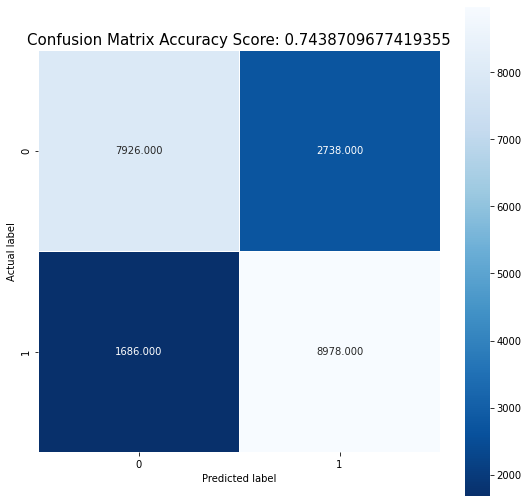

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(lr_expected, lr_predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


# Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_res, y_res)

rfc_predicted = rfc.predict(X_res)
rfc_expected = y_res
rfc_y_proba = rfc.predict_proba(X_test)[:,1]
score = rfc.score(X_test, y_test)
print('RFC =',score)
train_acc = rfc.score(X_res, y_res)
print("The Training Accuracy is {}".format(train_acc*100))

RFC = 1.0
The Training Accuracy is 100.0


In [65]:
from sklearn.metrics import classification_report
print(classification_report(rfc_expected, rfc_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10664
           1       1.00      1.00      1.00     10664

    accuracy                           1.00     21328
   macro avg       1.00      1.00      1.00     21328
weighted avg       1.00      1.00      1.00     21328



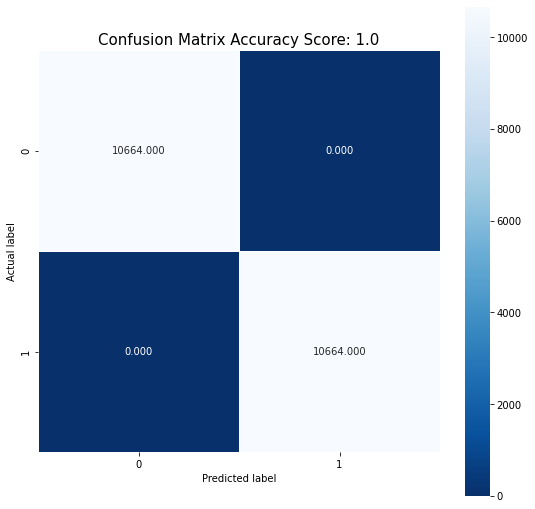

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(rfc_expected, rfc_predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Naive Bayes Classifier Model

In [67]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_res, y_res)

nbc_predicted = nbc.predict(X_res)
nbc_expected = y_res
nbc_y_proba = nbc.predict_proba(X_test)[:,1]
score = nbc.score(X_test, y_test)
print('NBC =',score)
train_acc = nbc.score(X_res, y_res)
print("The Training Accuracy is {}".format(train_acc*100))

NBC = 0.7610138248847926
The Training Accuracy is 74.83589647411854


In [68]:
from sklearn.metrics import classification_report
print(classification_report(nbc_expected, nbc_predicted))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75     10664
           1       0.75      0.74      0.75     10664

    accuracy                           0.75     21328
   macro avg       0.75      0.75      0.75     21328
weighted avg       0.75      0.75      0.75     21328



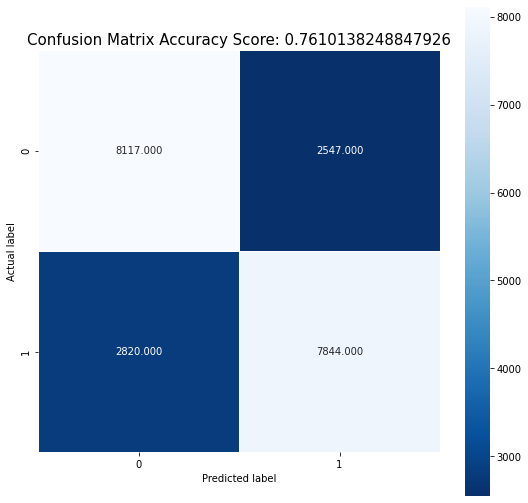

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(nbc_expected, nbc_predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# XGBClassifier

In [70]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_res, y_res)

xgb_predicted = xgb.predict(X_res)
xgb_expected = y_res
xgb_y_proba = xgb.predict_proba(X_test)[:,1]
score = xgb.score(X_test, y_test)
print('XGB =',score)
train_acc = xgb.score(X_res, y_res)
print("The Training Accuracy is {}".format(train_acc*100))

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:23:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB = 0.9889400921658986
The Training Accuracy is 99.42798199549887


In [71]:
print(classification_report(xgb_expected, xgb_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10664
           1       1.00      0.99      0.99     10664

    accuracy                           0.99     21328
   macro avg       0.99      0.99      0.99     21328
weighted avg       0.99      0.99      0.99     21328



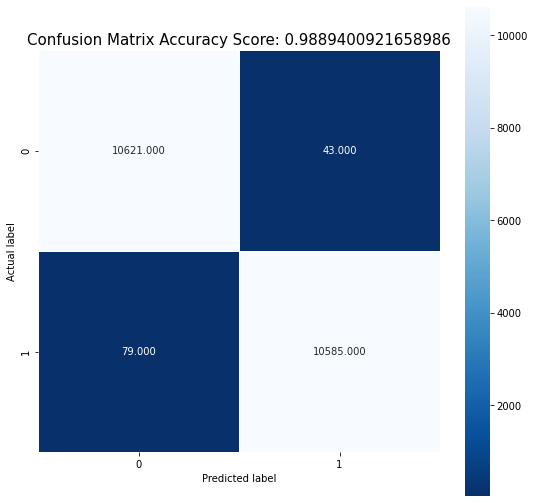

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(xgb_expected, xgb_predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_res, y_res)

dtc_predicted = dtc.predict(X_res)
dtc_expected = y_res
dtc_y_proba = dtc.predict_proba(X_test)[:,1]
score = dtc.score(X_test, y_test)
print('DTC =',score)
train_acc = dtc.score(X_res, y_res)
print("The Training Accuracy is {}".format(train_acc*100))

DTC = 1.0
The Training Accuracy is 100.0


In [74]:
print(classification_report(dtc_expected, dtc_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10664
           1       1.00      1.00      1.00     10664

    accuracy                           1.00     21328
   macro avg       1.00      1.00      1.00     21328
weighted avg       1.00      1.00      1.00     21328



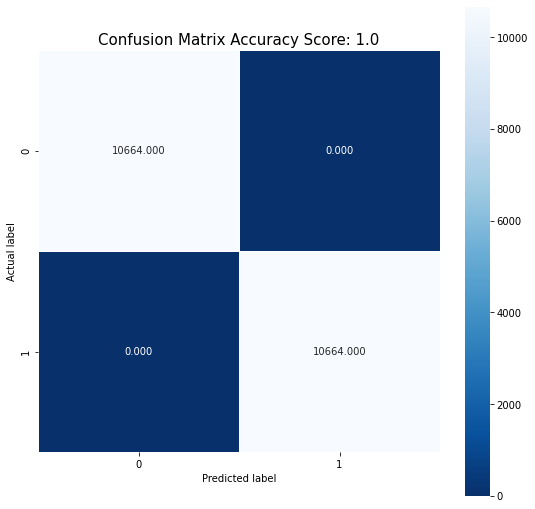

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(dtc_expected, dtc_predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# AUROC 

Text(0.5, 0, 'False Positive Rate')

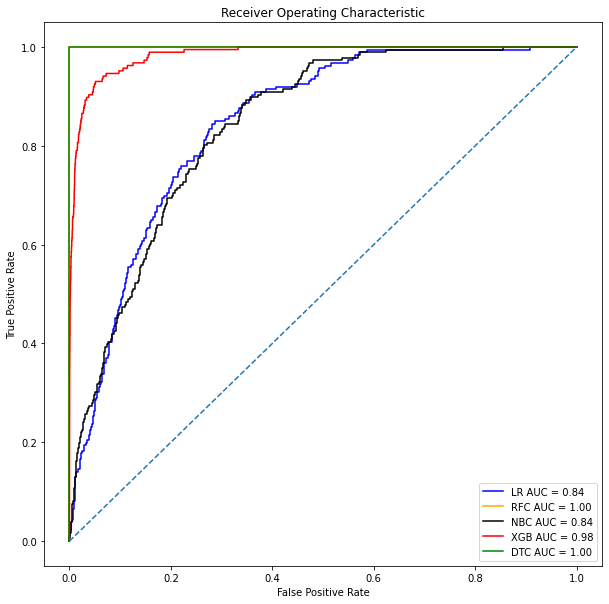

In [76]:
from sklearn.metrics import roc_curve, auc
lr_false_positive_rate, lr_true_positive_rate, thresholds = roc_curve(y_test, lr_y_proba)
lr_roc_auc = auc(lr_false_positive_rate, lr_true_positive_rate)

rfc_false_positive_rate, rfc_true_positive_rate, thresholds = roc_curve(y_test, rfc_y_proba)
rfc_roc_auc = auc(rfc_false_positive_rate, rfc_true_positive_rate)

nbc_false_positive_rate, nbc_true_positive_rate, thresholds = roc_curve(y_test, nbc_y_proba)
nbc_roc_auc = auc(nbc_false_positive_rate, nbc_true_positive_rate)

xgb_false_positive_rate, xgb_true_positive_rate, thresholds = roc_curve(y_test, xgb_y_proba)
xgb_roc_auc = auc(xgb_false_positive_rate, xgb_true_positive_rate)

dtc_false_positive_rate, dtc_true_positive_rate, thresholds = roc_curve(y_test, dtc_y_proba)
dtc_roc_auc = auc(dtc_false_positive_rate, dtc_true_positive_rate)




import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(lr_false_positive_rate,lr_true_positive_rate, color='blue',label = 'LR AUC = %0.2f' % lr_roc_auc)
plt.plot(rfc_false_positive_rate,rfc_true_positive_rate, color='orange',label = 'RFC AUC = %0.2f' % rfc_roc_auc)
plt.plot(nbc_false_positive_rate,nbc_true_positive_rate, color='black',label = 'NBC AUC = %0.2f' % nbc_roc_auc)
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate, color='red',label = 'XGB AUC = %0.2f' % xgb_roc_auc)
plt.plot(dtc_false_positive_rate,dtc_true_positive_rate, color='green',label = 'DTC AUC = %0.2f' % dtc_roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


# Cross Validation Logistic Regression

In [93]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logReg, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.98341014 0.98341014 0.98341014 0.98341014 0.98248848 0.98248848
 0.98248848 0.98248848 0.98248848 0.98248848]


# Cross Validation Random Forest Classifier

In [94]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.98248848 0.98341014 0.98248848 0.98248848 0.98156682 0.98248848
 0.98248848 0.98248848 0.98248848 0.98248848]


# Cross Validation Naive Bayes

In [95]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nbc, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.92718894 0.91612903 0.91520737 0.9124424  0.91889401 0.93917051
 0.92626728 0.93364055 0.92073733 0.93824885]


# Cross Validation XGBoost Classifier

In [96]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores)

[20:26:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

# Cross Validation Decision Tree Classifier


In [97]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtc, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.96774194 0.96497696 0.95760369 0.9640553  0.95576037 0.96589862
 0.95852535 0.97235023 0.97142857 0.96313364]
